# **Checklist**

o que falta fazer: 

- construir gráficos para a análise desses dados
- ver se precisa tirar algum outlier (dados discrepantes ou inconsistentes) -> *acho que não precisa pq o outlier que tem é justamente no preço e nós não vamos usar essa coluna*
- transformação dos dados usando algum encoder (transformar categóricos em numéricos)
- dividir em treino e teste (em porcentagem, ex: 20 pra teste e 80 pra treino)
- previsão do preço
- regressão linear
- gráficos sobre os ultimos 2
- finalizar com comentários

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import csv
import plotly.express as px

In [2]:
df = pd.read_csv("/content/AB_NYC_2019.csv")
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [3]:
df.sample(2)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
14787,11695338,Quiet and Modern Haven in NYC,16234492,Denise,Bronx,Soundview,40.82442,-73.86193,Private room,45,2,6,2016-08-07,0.15,1,0
4693,3297016,Super cute private room +amminities,2051075,Linda,Brooklyn,Crown Heights,40.67045,-73.95716,Entire home/apt,160,30,36,2019-06-15,0.63,2,228


In [ ]:
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

# Parte 1

**iremos fazer a previsão do preço a partir dos restantes dos dados**

previsão: price

colunas de base: 
  - neighbourhood_group, room_type *(categoricos)*
  - minimum_nights, number_of_reviews, reviews_per_month, availability_365 *(numéricos)*


  os dados categóricos teremos que transformar para numéricos
  não sei se todas essas colunas vão ser relevantes..falta analisar isso

# --- Preparação do Dataset ---

Vamos fazer uma limitação do dataset por conta de problemas encontrados enquanto fazíamos o homework, dessa forma, vamos limitar os dados por meio da data

In [4]:
filtro = (df['last_review'] >= '2019-01-01') & (df['last_review'] <= '2019-06-01')
df_filtro_2019 = df[filtro]

df_filtro_2019

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
22,8025,CBG Helps Haiti Room#2.5,22486,Lisel,Brooklyn,Park Slope,40.67989,-73.97798,Private room,80,1,39,2019-01-01,0.37,6,364
29,9657,Modern 1 BR / NYC / EAST VILLAGE,21904,Dana,Manhattan,East Village,40.72920,-73.98542,Entire home/apt,180,14,29,2019-04-19,0.24,1,67
30,9668,front room/double bed,32294,Ssameer Or Trip,Manhattan,Harlem,40.82245,-73.95104,Private room,50,3,242,2019-06-01,2.04,3,355
34,10452,Large B&B Style rooms,35935,Angela,Brooklyn,Bedford-Stuyvesant,40.68310,-73.95473,Private room,70,1,74,2019-05-12,0.66,2,269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45983,35013529,Cozy Room 4 Min Walk From Train,236853675,Jojo,Brooklyn,Crown Heights,40.67145,-73.93355,Private room,38,1,1,2019-05-28,0.70,1,88
46027,35035847,TimeSquare High-level modern apartment 1BDR!,42174219,Zack,Manhattan,Theater District,40.76113,-73.98557,Private room,180,2,1,2019-06-01,0.77,1,31
46092,35069416,005 Comfy and Pleasant Shared Room,137999892,Simranjeet,Staten Island,Concord,40.60625,-74.08900,Shared room,30,4,1,2019-06-01,0.77,7,68
46113,35085802,Huge bedroom with private access to backyard.,201987117,Gershon,Queens,Ridgewood,40.70629,-73.91281,Private room,70,1,1,2019-05-27,0.68,1,0


Separando as colunas que iremos usar

In [5]:
df = df_filtro_2019[['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','availability_365', 'price']]
df

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
1,Manhattan,Entire home/apt,1,45,0.38,355,225
22,Brooklyn,Private room,1,39,0.37,364,80
29,Manhattan,Entire home/apt,14,29,0.24,67,180
30,Manhattan,Private room,3,242,2.04,355,50
34,Brooklyn,Private room,1,74,0.66,269,70
...,...,...,...,...,...,...,...
45983,Brooklyn,Private room,1,1,0.70,88,38
46027,Manhattan,Private room,2,1,0.77,31,180
46092,Staten Island,Shared room,4,1,0.77,68,30
46113,Queens,Private room,1,1,0.68,0,70


# --- Transformação dos Dados (novo) ---

In [6]:
X_df = df.iloc[:, 0:6].values
X_df

array([['Manhattan', 'Entire home/apt', 1, 45, 0.38, 355],
       ['Brooklyn', 'Private room', 1, 39, 0.37, 364],
       ['Manhattan', 'Entire home/apt', 14, 29, 0.24, 67],
       ...,
       ['Staten Island', 'Shared room', 4, 1, 0.77, 68],
       ['Queens', 'Private room', 1, 1, 0.68, 0],
       ['Manhattan', 'Private room', 21, 1, 0.79, 70]], dtype=object)

In [7]:
y_df = df.iloc[:, 6].values
y_df

array([225,  80, 180, ...,  30,  70, 125])

In [8]:
from sklearn.preprocessing import LabelEncoder
X_neighbourhood_group = LabelEncoder()
X_room_type = LabelEncoder()

In [9]:
X_df[:, 0] = X_neighbourhood_group.fit_transform(X_df[:, 0])
X_df[:, 1] = X_room_type.fit_transform(X_df[:, 1])

In [10]:
column_names = ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','availability_365']
df_airbnb = pd.DataFrame(X_df, columns = column_names)

In [11]:
df_airbnb

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,2,0,1,45,0.38,355
1,1,1,1,39,0.37,364
2,2,0,14,29,0.24,67
3,2,1,3,242,2.04,355
4,1,1,1,74,0.66,269
...,...,...,...,...,...,...
8140,1,1,1,1,0.7,88
8141,2,1,2,1,0.77,31
8142,4,2,4,1,0.77,68
8143,3,1,1,1,0.68,0


In [13]:
#padronizando os dados

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_airbnb = scaler.fit_transform(df_airbnb)

In [14]:
df_airbnb

array([[ 0.45703902, -0.94331556, -0.46158661,  0.86994969, -0.56198591,
         1.67515343],
       [-0.89417072,  0.89699707, -0.46158661,  0.6669131 , -0.57385518,
         1.74202875],
       [ 0.45703902, -0.94331556,  0.39463949,  0.32851878, -0.7281558 ,
        -0.46485665],
       ...,
       [ 3.15945852,  2.7373097 , -0.26399597, -0.61898533, -0.09908406,
        -0.45742606],
       [ 1.80824877,  0.89699707, -0.46158661, -0.61898533, -0.20590756,
        -0.96270622],
       [ 0.45703902,  0.89699707,  0.85568431, -0.61898533, -0.07534551,
        -0.44256488]])

In [15]:
column_names = ['neighbourhood_group', 'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month','availability_365']
df_airbnb = pd.DataFrame(df_airbnb, columns = column_names)

In [16]:
df_airbnb

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
0,0.457039,-0.943316,-0.461587,0.869950,-0.561986,1.675153
1,-0.894171,0.896997,-0.461587,0.666913,-0.573855,1.742029
2,0.457039,-0.943316,0.394639,0.328519,-0.728156,-0.464857
3,0.457039,0.896997,-0.329860,7.536318,1.408314,1.675153
4,-0.894171,0.896997,-0.461587,1.851293,-0.229646,1.036123
...,...,...,...,...,...,...
8140,-0.894171,0.896997,-0.461587,-0.618985,-0.182169,-0.308814
8141,0.457039,0.896997,-0.395723,-0.618985,-0.099084,-0.732358
8142,3.159459,2.737310,-0.263996,-0.618985,-0.099084,-0.457426
8143,1.808249,0.896997,-0.461587,-0.618985,-0.205908,-0.962706


# --- Data Analysis --- 

1. Define the goal of your goal and identify the output Y of your predictive model.
Describe your data and their features in terms of number of observations N, number
of predictor variables D. Make sure that predictors are numerical, not categorical.

**R:**

Objetivo: prever o preço a partir das outras colunas do nosso dataset;

Descrição: São 48895 análises (antes da limpeza dos dados), iremos utilizar a coluna price para as previsões e as colunas neighbourhood_group, neighbourhood room_type (categoricos) e minimum_nights, number_of_reviews, reviews_per_month, calculated_host_listings_count, availability_365 (numéricos), as quais iremos utilizar a transformação para categóricos virarem numéricos, totalizando 8 colunas de previsores.

2. Perform a mono-variate analysis of each of the D predictors. Specifically, you must
plot their histogram, calculate their mean µd, standard deviation σd and skewness γd,
with d = 1, . . . , D, using all the N observations

**R:**

Achando o mean e o deviation>

In [ ]:
df.describe()

,minimum_nights,number_of_reviews,reviews_per_month,availability_365,price
count,8145.000000,8145.000000,8145.000000,8145.000000,8145.000000
mean,8.008226,19.291835,0.853479,129.559853,139.889503
std,15.183838,29.553137,0.842563,134.587067,145.937974
min,1.000000,1.000000,0.020000,0.000000,0.000000
25%,2.000000,3.000000,0.310000,0.000000,65.000000
50%,3.000000,8.000000,0.580000,78.000000,100.000000
75%,6.000000,23.000000,1.080000,262.000000,170.000000
max,365.000000,474.000000,9.970000,365.000000,5000.000000


In [ ]:
df_airbnb.describe()

,neighbourhood_group,room_type,minimum_nights,number_of_reviews,reviews_per_month,availability_365
count,8145,8145,8145,8145,8145.00,8145
unique,5,3,58,202,444.00,366
top,2,0,2,1,0.16,0
freq,3493,4155,1825,1035,257.00,2106


In [ ]:
df_airbnb['minimum_nights'].mean()

8.008225905463474

Descobrindo o skewness

In [ ]:
df_airbnb.skew(axis = 0)

neighbourhood_group    0.412320
room_type              0.374882
minimum_nights         9.728075
number_of_reviews      3.721236
reviews_per_month      2.516911
availability_365       0.541463
dtype: float64

Pegando um valor que é necessário pra questão

In [ ]:
df_airbnb['reviews_per_month'].mean()

0.853479435236338

In [ ]:
df_airbnb['reviews_per_month'].std()

0.8425629514824868

In [ ]:
#df['calculated_host_listings_count'].mean()

Plotando os histogramas dos previsores:

In [ ]:
plt.style.use('seaborn-darkgrid')

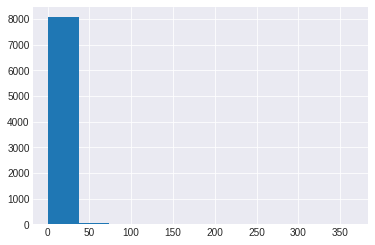

In [ ]:
plt.hist(x = df_airbnb['minimum_nights']);

In [ ]:
# esse grafico aqui é mais detalhado do que o hist acima ("mais aberto")

plot = px.histogram(df_airbnb, x = "minimum_nights")
plot.show()

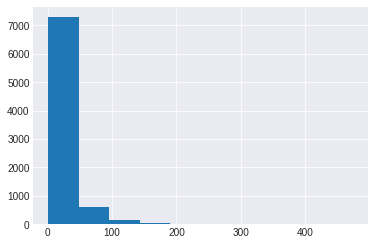

In [ ]:
plt.hist(x = df_airbnb['number_of_reviews']);

In [ ]:
plot = px.histogram(df_airbnb, x = 'number_of_reviews')
plot.show()

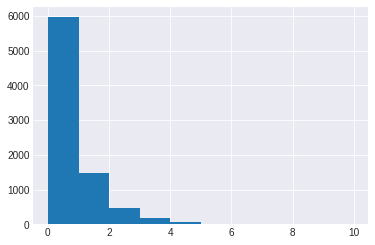

In [ ]:
plt.hist(x = df_airbnb['reviews_per_month']);

In [ ]:
plot = px.histogram(df_airbnb, x = 'reviews_per_month')
plot.show()

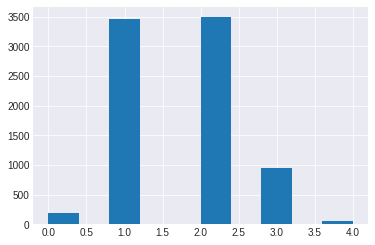

In [ ]:
plt.hist(x = df_airbnb['neighbourhood_group']);

In [ ]:
plot = px.histogram(df_airbnb, x = 'neighbourhood_group')
plot.show()

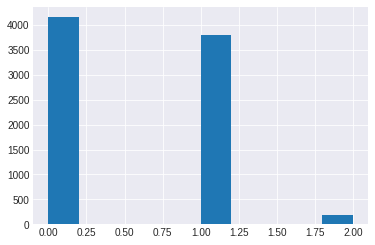

In [ ]:
plt.hist(x = df_airbnb['room_type']);

In [ ]:
plot = px.histogram(df_airbnb , x= 'room_type')
plot.show()

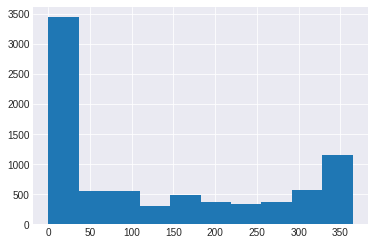

In [ ]:
plt.hist(x = df_airbnb['availability_365']);

In [ ]:
plot = px.histogram(df_airbnb , x= 'availability_365')
plot.show()

3. Perform a bi-variate analysis of the predictors. Specifically, you must plot the scatter
plots between all pairs of predictors. Investigate the existence of potential relationships
between pairs of predictors and the presence of potential outliers

previsores: neighbourhood_group,	room_type	minimum_nights,	number_of_reviews,	reviews_per_month,	availability_365

In [ ]:
plot = px.scatter_matrix(df_airbnb, dimensions= ['minimum_nights', 'number_of_reviews'])
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['minimum_nights', 'reviews_per_month'])
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['minimum_nights', 'neighbourhood_group'])
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['minimum_nights', 'availability_365'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['number_of_reviews', 'reviews_per_month'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['number_of_reviews', 'calculated_host_listings_count'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['number_of_reviews', 'availability_365'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['reviews_per_month', 'calculated_host_listings_count'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['reviews_per_month', 'availability_365'], color = 'host_id')
plot.show()

In [ ]:
plot = px.scatter_matrix(df, dimensions= ['calculated_host_listings_count', 'availability_365'], color = 'host_id')
plot.show()

**3.2**

Are there any relevant relationships between pairs of predictors? If yes, are these relationships
linear? Quantify linear dependence between predictors using pair-wise correlation
coefficients $\rho d_1, \rho d_j $ , with di; dj = 1,...,D. Either tabulate the correlation coefficients as a
correlation matrix, or show the matrix as an image. Comment on the results.


**R:** 

Sim, notamos que existem relações entre diversos preditores, como exemplo, entre numeros minimo de noites e numeros de reviews, numero de reviews e numero de reviews mês.



In [ ]:
df_aux = df[['minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]

matrix = df_aux.corr(method ='pearson')

plt.figure(figsize=(16,12))

cmap = sns.diverging_palette(250, 15, s=75, l=40, n=9, center="light", as_cmap=True)

_ = sns.heatmap(matrix, center=0, annot=True, fmt='.2f', square=True, cmap=cmap)

Vemos que existe uma relação moderada entre número de reviews por mês e número de reviews 0.3 $\leq$ |r| $<$0.7 e as outras relações são fracas 0.0 $\leq$ |r| $<$0.3

In [ ]:
airbnb

In [ ]:
airbnb_normalized = airbnb - airbnb.mean()
airbnb_normalized

Agora devemos calcular a matrix de covariancia

In [ ]:
for i in range(0, len(airbnb_normalized.columns)):
    airbnb_normalized.iloc[:,i] = pd.to_numeric(airbnb_normalized.iloc[:,i], errors='ignore')
covMatrix = np.cov(airbnb_normalized,rowvar = False)
covMatrix

In [ ]:
autovalores, autovetores = np.linalg.eig(covMatrix)

autovalores

In [ ]:
df

**Question:**

Are the data well (or better) separated? What predictors show a high degree of overlapand thus are harder to separate?

Better separeted = desejamos tirar preditores que possuem correlações, dados melhor separados significa dados com pouca correlação, para ter o máximo de informação com a menor quantidade de dados

**R:**



# --- Limpeza dos Dados ---

In [ ]:
df.info()

In [ ]:
# checagem de valores nulos no df
df.isnull().sum()

In [ ]:
# retirando os valores nulos para a coluna 'name'

df.dropna(subset = ['name'], inplace = True) # o inplace é pra garantir que o df atualize os dados substituídos
df.isnull().sum()

In [ ]:
# retirando os valores nulos para a coluna 'host_name'

df.dropna(subset = ['host_name'], inplace = True)
df.isnull().sum()

In [ ]:
# análise dos valores nulos para number_of_reviews
df.loc[df['number_of_reviews'] == 0].head()

In [ ]:
# substituindo os valores NaN da coluna reviews_per_month para 0

df['reviews_per_month'] = df['reviews_per_month'].fillna(0.0)

In [ ]:
# fazendo a checagem apos a limpeza

df.isnull().sum()

In [ ]:
# tirando valores duplicados

df.drop_duplicates()

In [ ]:
# contagem final dos dados apos a limpeza

df

In [ ]:
df.info() # last_review não precisa resolver o problema da coluna pq nao iremos usar na previsão

# Linear Regression